In [24]:
import numpy as np
import pandas as pd
import random

# data visualisations 
import matplotlib.pyplot as plt
import seaborn as sns

# statsmodels 
from statsmodels.api import GLM, families
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.api import Logit, add_constant
from statsmodels.stats.stattools import durbin_watson

# sklearn 
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix


## Importing data set

In [25]:
import pandas as pd
df=pd.read_csv('Eight_Categories_Product_Dataset.csv')
df.head()


,product_id,product,category,rating,discount,price,may_purchase
0,P1,Curtain,Home,6.6,17.8,1805,1
1,P2,Dining Table,Furniture,6.7,22.6,2139,1
2,P3,Water Bottle,Health & Sports,5.4,30.8,3329,1
3,P4,Bedsheet,Home,5.4,36.6,1903,0
4,P5,Curtain,Home,4.8,19.7,2123,0


## Displaying first and last five rows

In [26]:
df.tail()

,product_id,product,category,rating,discount,price,may_purchase
99995,P99996,Diapers,Baby Products,6.6,23.1,2042,1
99996,P99997,Mixer Grinder,Home,5.4,35.0,1882,0
99997,P99998,Baby Bottle,Baby Products,4.7,25.8,2146,0
99998,P99999,Baby Blanket,Baby Products,7.1,28.7,3416,1
99999,P100000,Bedsheet,Home,5.7,39.8,2347,0


## Finding min and max and unique values for a column

In [27]:
df['may_purchase'].min()

0

In [28]:
df['may_purchase'].max()

1

In [29]:
df['may_purchase'].nunique()

2

## Identifying null values

In [30]:
missing_per_column=df.isna().sum()
print(missing_per_column)

product_id      0
product         0
category        0
rating          0
discount        0
price           0
may_purchase    0
dtype: int64


## Total values for each category

In [31]:
counts=df['category'].value_counts()
print(counts)

category
Baby Products      39900
Home               30014
Health & Sports    10115
Furniture           6990
Fashion             5106
Beauty              4938
Pet Supplies        1943
Books                994
Name: count, dtype: int64


## Bar Chart (count by category)

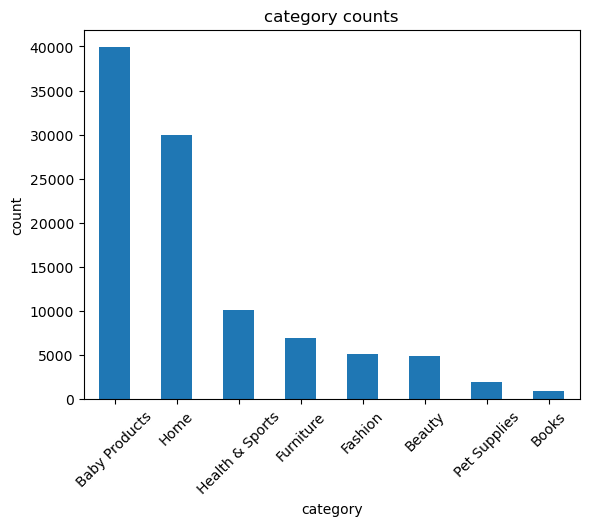

In [32]:
category_count=df['category'].value_counts()
category_count.plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('category')
plt.ylabel('count')
plt.title('category counts')
plt.show()

## Grouped Bar Chart for each category Buyers and Non-Buyers

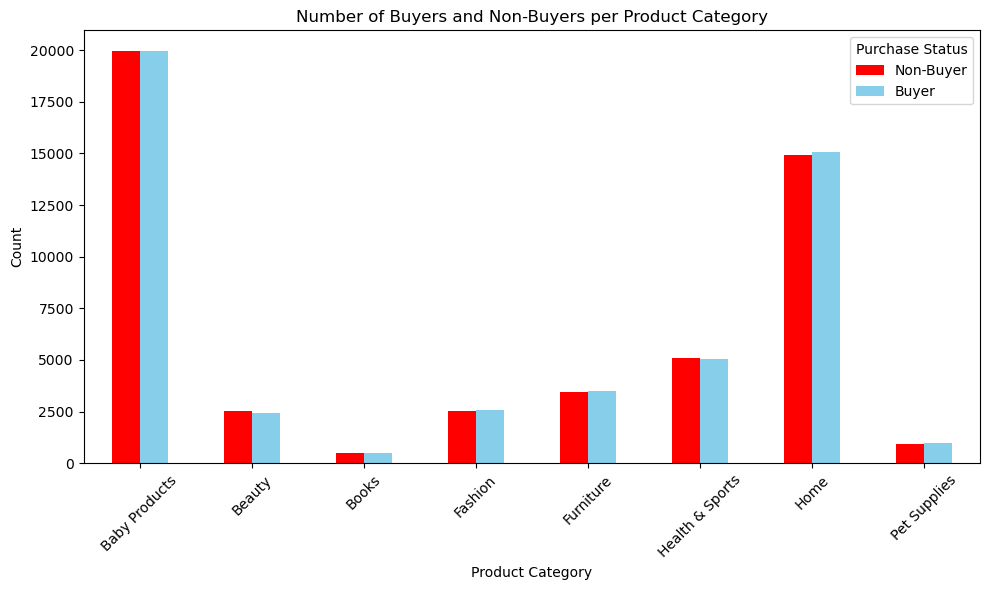

In [33]:
grouped = df.groupby(['category', 'may_purchase']).size().unstack(fill_value=0)

# Rename columns for clarity
grouped.columns = ['Non-Buyer', 'Buyer']

# Plot the grouped bar chart
grouped.plot(kind='bar', figsize=(10, 6), color=['red', 'skyblue'])

plt.title('Number of Buyers and Non-Buyers per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Purchase Status')
plt.tight_layout()
plt.show()

In [34]:
df.describe()

,rating,discount,price,may_purchase
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.336928,30.330254,2670.521400,0.500570
std,1.115012,6.902360,573.127609,0.500002
min,1.000000,0.000000,300.000000,0.000000
25%,4.500000,25.700000,2282.750000,0.000000
50%,5.400000,30.300000,2669.000000,1.000000
75%,6.100000,35.000000,3057.000000,1.000000
max,10.000000,60.000000,5000.000000,1.000000


# Outlier detection and Treatment

## Box plot for various dimensions

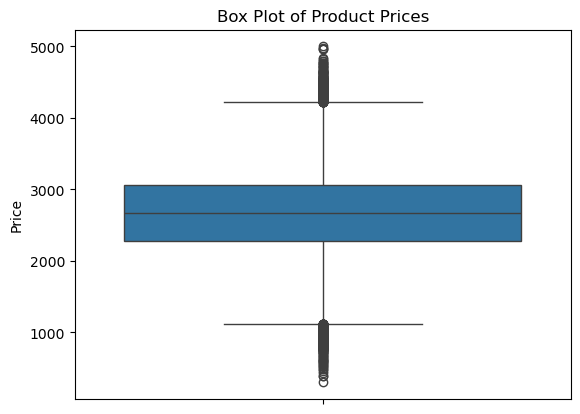

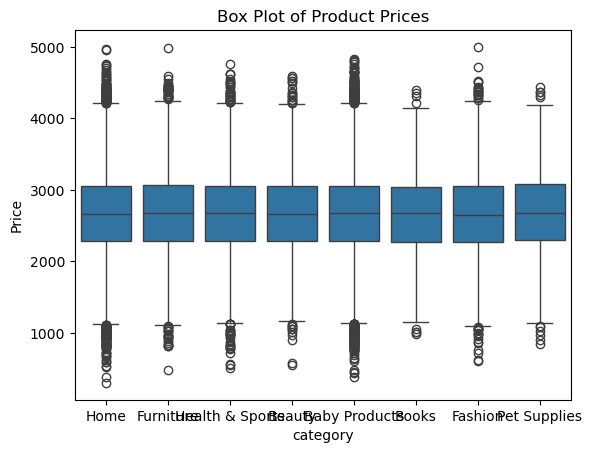

In [35]:
sns.boxplot(y='price', data=df)

plt.title('Box Plot of Product Prices')
plt.ylabel('Price')
plt.show()
#category wise
sns.boxplot(x='category',y='price', data=df)

plt.title('Box Plot of Product Prices')
plt.ylabel('Price')
plt.show()

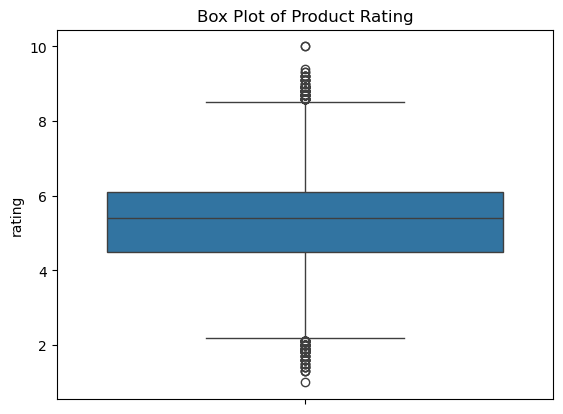

In [36]:
sns.boxplot(y='rating', data=df)

plt.title('Box Plot of Product Rating')
plt.ylabel('rating')
plt.show()

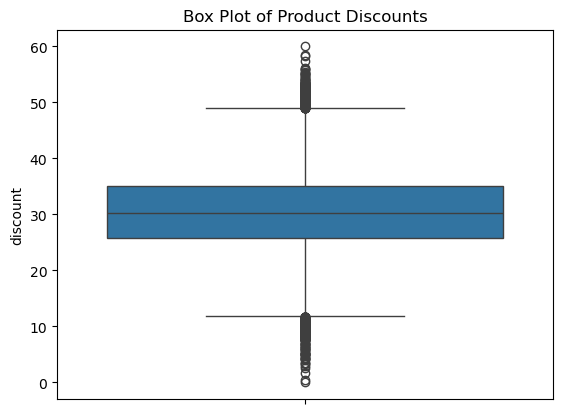

In [37]:
sns.boxplot(y='discount', data=df)

plt.title('Box Plot of Product Discounts')
plt.ylabel('discount')
plt.show()

## IQR method

In [38]:
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)

#Calculate IQR
IQR = Q3 - Q1
'''print("IQR for Rating:")
print(IQR)'''
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['rating'] < lower_bound) | (df['rating'] > upper_bound)]
outlier_count=outliers.shape[0]
print("Outlier count:")
print(outlier_count)
Q1 = df['discount'].quantile(0.25)
Q3 = df['discount'].quantile(0.75)

#Calculate IQR
IQR = Q3 - Q1
'''print("IQR for Discount:")
print(IQR)'''
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['discount'] < lower_bound) | (df['discount'] > upper_bound)]
outlier_count=outliers.shape[0]
print("Outlier count:")
print(outlier_count)

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

#Calculate IQR
IQR = Q3 - Q1
'''print("IQR for Price:")
print(IQR)'''
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outlier_count=outliers.shape[0]
print("Outlier count:")
print(outlier_count)



Outlier count:
217
Outlier count:
702
Outlier count:
696


# EDA

## Heat map for price,rating,discount and may_purchase

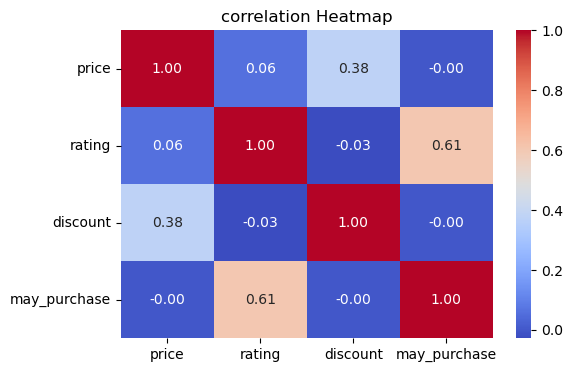

In [39]:
corr=df[['price','rating','discount','may_purchase']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation Heatmap')
plt.show()

## Feature Engineering and Feature selection 

In [40]:
encoded_df=pd.get_dummies(df[['category','product']])
encoded_df=encoded_df.astype(int)
pd.set_option('display.max_columns',None)
encoded_df                 

,category_Baby Products,category_Beauty,category_Books,category_Fashion,category_Furniture,category_Health & Sports,category_Home,category_Pet Supplies,product_Baby Blanket,product_Baby Bottle,product_Baby Oil,product_Bedsheet,product_Biography,product_Bird Cage,product_Bookshelf,product_Cat Litter,product_Coffee Table,product_Cradle,product_Curtain,product_Diapers,product_Dining Table,product_Electric Kettle,product_Energy Drink,product_Food,product_Gym Gloves,product_Handbag,product_Jacket,product_Jeans,product_Kurta,product_LED Bulb,product_Leash,product_Lipstick,product_Mixer Grinder,product_Moisturizer,product_Novel,product_Office Chair,product_Pacifier,product_Perfume,product_Pet Shampoo,product_Pressure Cooker,product_Protein Powder,product_Running Shoes,product_Sandals,product_Saree,product_Shampoo,product_Sneakers,product_Sofa Cover,product_Story Books,product_T-shirt,product_Textbook,product_Toys,product_Wardrobe,product_Water Bottle,product_Yoga Mat,product_biography,product_poetry books
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99996,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99997,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99998,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## combining encoded values

In [41]:
df_final=pd.concat([df[['rating','price','discount','may_purchase']],encoded_df],axis=1)
df_final

,rating,price,discount,may_purchase,category_Baby Products,category_Beauty,category_Books,category_Fashion,category_Furniture,category_Health & Sports,category_Home,category_Pet Supplies,product_Baby Blanket,product_Baby Bottle,product_Baby Oil,product_Bedsheet,product_Biography,product_Bird Cage,product_Bookshelf,product_Cat Litter,product_Coffee Table,product_Cradle,product_Curtain,product_Diapers,product_Dining Table,product_Electric Kettle,product_Energy Drink,product_Food,product_Gym Gloves,product_Handbag,product_Jacket,product_Jeans,product_Kurta,product_LED Bulb,product_Leash,product_Lipstick,product_Mixer Grinder,product_Moisturizer,product_Novel,product_Office Chair,product_Pacifier,product_Perfume,product_Pet Shampoo,product_Pressure Cooker,product_Protein Powder,product_Running Shoes,product_Sandals,product_Saree,product_Shampoo,product_Sneakers,product_Sofa Cover,product_Story Books,product_T-shirt,product_Textbook,product_Toys,product_Wardrobe,product_Water Bottle,product_Yoga Mat,product_biography,product_poetry books
0,6.6,1805,17.8,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6.7,2139,22.6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5.4,3329,30.8,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,5.4,1903,36.6,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.8,2123,19.7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6.6,2042,23.1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99996,5.4,1882,35.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99997,4.7,2146,25.8,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99998,7.1,3416,28.7,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Dependent and Independent variables

In [42]:
x=df_final.drop(columns='may_purchase',axis=1)
y=df_final[['may_purchase']]

# Model building and evaluation

C:\Users\DELL\AppData\Local\Temp\ipykernel_8280\2997180566.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2105.00001 2439.00001 3629.00001 ... 2446.00001 3716.00001 2647.00001]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, col] = X[col] + abs(X[col].min()) + 1e-5
C:\Users\DELL\AppData\Local\Temp\ipykernel_8280\2997180566.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, f'{col}_log'] = X[col] * np.log(X[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_8280\2997180566.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

Optimization terminated successfully.
         Current function value: 0.464571
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           may_purchase   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99993
Method:                           MLE   Df Model:                            6
Date:                Sat, 26 Jul 2025   Pseudo R-squ.:                  0.3298
Time:                        16:15:30   Log-Likelihood:                -46457.
converged:                       True   LL-Null:                       -69315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.3036      0.848     -8.612      0.000      -8.966      -5.641
rating           2.1033

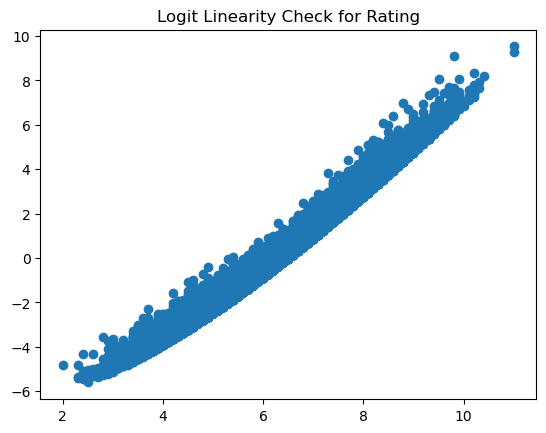

Optimization terminated successfully.
         Current function value: 0.464571
         Iterations 7
Accuracy: 0.8185999788516443
Confusion Matrix:
 [[7576 1743]
 [1688 7907]]


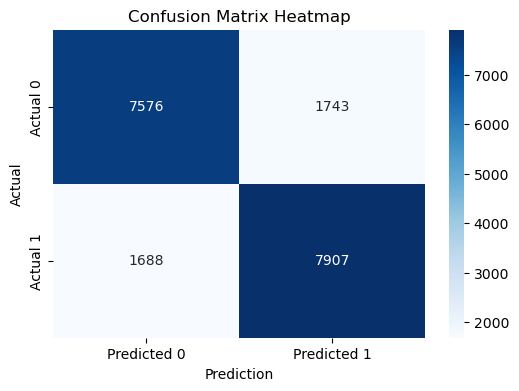

In [46]:
X= x[['rating',	'discount',	'price']]
for col in ['rating', 'discount', 'price']:
    X.loc[:, col] = X[col] + abs(X[col].min()) + 1e-5
for col in ['rating', 'discount', 'price']:
    X.loc[:, f'{col}_log'] = X[col] * np.log(X[col])


X_bt = X[['rating', 'discount', 'price', 'rating_log', 'discount_log', 'price_log']]
X_bt = sm.add_constant(X_bt)
y_bt = y
model = sm.Logit(y_bt, X_bt).fit()
print(model.summary())



logit_results = GLM(y, X, family=families.Binomial()).fit()
predicted = logit_results.predict(X)
log_odds = np.log(predicted / (1 - predicted))

plt.scatter(X['rating'].values, log_odds)
plt.title("Logit Linearity Check for Rating")
plt.show()


X = sm.add_constant(X)
model = sm.Logit(y, X).fit()

influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

n = X.shape[0]
threshold = 4 / n
influential_points = (cooks_d > threshold)
num_influential = influential_points.sum()


df_cleaned = df_final.drop(index=df_final[influential_points].index)


X_cleaned = df_cleaned.drop("may_purchase", axis=1)
y_cleaned = df_cleaned["may_purchase"]



X1=X_cleaned[["rating","discount","price"]]
y1=y_cleaned

scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)


conf_matrix = confusion_matrix(y1_test, y1_pred)
print("Confusion Matrix:\n", conf_matrix)




plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()



In [45]:
new_customer = pd.DataFrame({
    'rating': [6.0],
    'discount': [33],
    'price': [3000]
})


new_customer_scaled = scaler.transform(new_customer[['rating', 'discount', 'price']])  # Match training order


prob = model.predict_proba(new_customer_scaled)[0][1]
prediction = model.predict(new_customer_scaled)[0]


print(f"Predicted Probability of Purchase: {prob:.2f}")
print("Prediction:", "May Purchase the Product (1)" if prediction == 1 else "May Not Purchase the Product (0)")


Predicted Probability of Purchase: 0.84
Prediction: May Purchase the Product (1)
